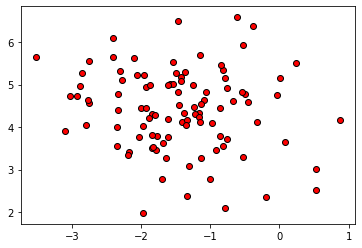

In [5]:
from sklearn.datasets import make_blobs
#导人画图工具
import matplotlib.pyplot as plt
#导人数据集拆分工具
from sklearn.model_selection import train_test_split
#生成样本数为200 ，分类为2 的数据集
blobs= make_blobs(centers=1,random_state=1)
X_blobs=blobs[0]
#将生成的数据集进行可视化
plt.scatter (X[:,0],X[:,1],c="r",cmap=plt.cm.spring,edgecolor='k')#c就是这个点的label啦
plt.show()

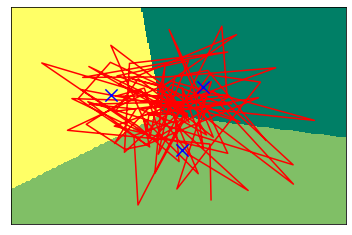

In [13]:
#导入KMeans 工具
from sklearn.cluster import KMeans
import numpy as np
#要求KMeans 将数据聚为3 类
kmeans = KMeans(n_clusters=3)
#拟合数据
kmeans.fit(X_blobs)#先fit再predict
#下面是用来画图的代码
x_min, x_max = X_blobs[:,0].min()-0.5, X_blobs[:,0].max()+0.5
y_min , y_max = X_blobs[:,1].min()-0.5 ,X_blobs[:,1].max()+0.5
xx , yy = np.meshgrid(np.arange(x_min, x_max, 0.02) ,
np.arange(y_min, y_max , 0.02))
Z = kmeans.predict(np . c_[xx.ravel() , yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure (1)
plt.clf()
plt.imshow(Z , interpolation= "nearest",
extent =(xx.min(), xx.max(), yy.min(), yy.max ()),
cmap=plt.cm.summer,
aspect="auto",origin= 'lower')

plt.plot(X_blobs[:,0],X_blobs[:,1] ,"r",markersize=5 )
#用蓝色叉号代表聚类的中心
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],
marker= "x", s=150,linewidths=3,
color="b", zorder=10)
plt.xlim(x_min,x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
#显示图像
plt.show()

In [15]:
kmeans.labels_

array([1, 1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 1, 2, 2,
       0, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0,
       2, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1])

从结果中可以看到， K 均值对数据进行的聚类和分类有些类似，是用0 、
l 、2 三个数字来代表数据的类，并且储存在.labels 属性中。
从好的一面来看， K 均值算法十分简单而且容易理解，但它也有很明显的局限性。
例如，它认为每个数据点到聚类中心的方向都是同等重要的。这样一来，对于“形状”

凝聚聚类算法其实有点像叶子上的露珠，每个露珠最终都会汇聚成一个大的水珠的


要理解凝聚聚类算法其实很简单， 也很有意思。在夏天观察雨后的荷叶，会发现一
个有意思的现象：在重力的作用下，荷叶上的小水珠会向荷叶中心聚集，并且凝聚成一
个大水珠，这也可以用来形象地描述凝聚聚类算法。实际上，凝聚聚类算法是一揽子算
法的集合，而这一揽子算法的共同之处是，它们首先将每个数据点看成是一个聚类，也
就是荷叶上的小水珠，然后把相似的聚类进行合井，形成了一个较大的水珠。然后重复
这个过程，直到达到了停止的标准。那么停止的标准是什么昵？在scikit- am 中， 停止
的标准是剩下的“大水珠”的数量。

AttributeError: module 'matplotlib.pyplot' has no attribute 'shοw'

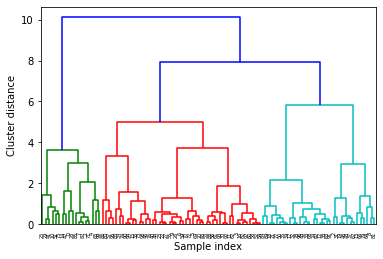

In [17]:
#导入dendrogram和ward工具
from scipy.cluster.hierarchy import dendrogram, ward
#使用连线的方式进行可视化
linkage = ward(X_blobs)
dendrogram(linkage)
ax = plt.gca()
#设定横纵轴标签
plt.xlabel("Sample index"  )
plt.ylabel("Cluster distance")
#显示图像
plt.shοw()

凝聚聚类算法是自下而上， 不断地合并相似的
聚类中心，以便让类别越来越少，同时每个聚类中心的距离也就原来越远。这种逐级生
成的聚类方法称为Hierarchy clustering。

DBSCAN density-based spatial clustering of application with noise 基于密度的

如果只是看名字的话， 或许会觉得这个算法和“数据库扫描”有什么关系， 因为直
观看起来，它像是DataBase Scan 的缩写。然而实际上并不是这样， 这个算法的全名称为
“基于密度的有噪声应用空间聚类” （ Density-based spatial clustering of applications with
noise ）。这是一个很长且拗口的名字， 但是也反应了它的工作原理。DB SCAN 是通过对
特征空间内的密度进行检测， 密度大的地方它会认为是一个类，而密度相对小的地方它
会认为是一个分界线。也正是由于这样的工作机制，使得DB SCAN 算法不需要像K 均
值或者是凝聚聚类算法那样在一开始就指定聚类的数量n_clusters,不用一开始就去设定类别的参数

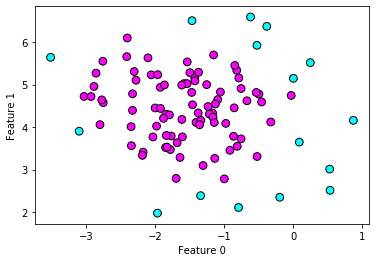

In [21]:
#导入DB SCAN
from sklearn.cluster import DBSCAN
db = DBSCAN()
#使用DBSCAN 拟合数据
clusters = db.fit_predict(X_blobs)
#绘制散点图
plt.scatter(X_blobs[:,0],X_blobs[ :,1],c=clusters, cmap=plt.cm.cool,#c=clusters其实就是给出label了
s=60 , edgecolor= "k")
#设置横纵轴标签
plt.xlabel ("Feature 0")
plt.ylabel ("Feature 1")
#显示图像
plt.show()

In [22]:
clusters

array([-1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1],
      dtype=int64)

-1表示的是这个是噪声，也就是没有被归类


说到这里，就不能不提DB SCAN 中两个非常重要的参数： 一是eps ；一个是min_
samples 。eps 指定的是考虑划入同一“地”的样本距离有多远， eps 值设置得越大，则
聚类所覆盖的数据点越多，反之则越少。默认情况下eps 的值为0 . 5 。

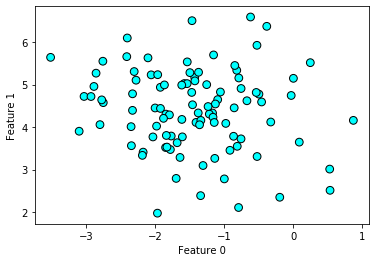

In [23]:
#导入DB SCAN
from sklearn.cluster import DBSCAN
db1 = DBSCAN(eps=2)
#使用DBSCAN 拟合数据
clusters1= db1.fit_predict(X_blobs)
#绘制散点图
plt.scatter(X_blobs[:,0],X_blobs[ :,1],c=clusters1, cmap=plt.cm.cool,#c=clusters其实就是给出label了
s=60 , edgecolor= "k")
#设置横纵轴标签
plt.xlabel ("Feature 0")
plt.ylabel ("Feature 1")
#显示图像
plt.show()

而min_sampl es 参数指定的是在某个数据点周围， 被看成是聚类核心点的个数，
min_ samples 值越大， 则核心数据点越少， 噪声也就越多： 反之min_sample 值越小， 噪
声也就越少。默认的min_samples 值是2

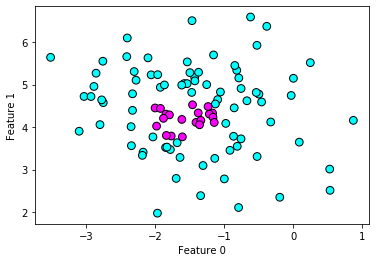

In [28]:
#导入DB SCAN
from sklearn.cluster import DBSCAN
db2 = DBSCAN(min_samples=20)#min_samples越大，中间的那一坨就越小
#使用DBSCAN 拟合数据
clusters2= db2.fit_predict(X_blobs)
#绘制散点图
plt.scatter(X_blobs[:,0],X_blobs[ :,1],c=clusters2, cmap=plt.cm.cool,#c=clusters其实就是给出label了
s=60 , edgecolor= "k")
#设置横纵轴标签
plt.xlabel ("Feature 0")
plt.ylabel ("Feature 1")
#显示图像
plt.show()

综上，虽然DB SCAN 并不需要我们在开始训练算法的时候就指定clusters 的数量，
但是通过对eps 和min_samples 参数赋值，相当于间接地指定了clusters 的数量。尤其是
eps 参数尤为重要，因为它规定了某一“地”的范围大小。而且在实际应用中，如果将数
据集先用MinMaxScaler 或者S tandardScaler 进行预处理，那么DB SCAN 算法的表现会更
好（因为这两种预处理方法把数据的范围控制得比较集中） 。